# Advanced Neural Network Architectures

This notebook introduces and shows applications of two particular neural network (NN) architectures - convolutional (CNN) and recurrent (RNN) neural networks. While vanilla NNs assume fixed input size, the CNNs and RNNs are applicable to the inputs of variable dimensions. The CNN’s are commonly used to work with graphical or other 2d or 3d array inputs of variable dimensions, while RNN’s are useful for analyzing sequential data of variable length, such as natural text or time-series signal (voice, sensor measurements etc).

## Convolutional Neural Networks (CNN)

A CNN is a type of Neural Network (NN) frequently used for image classification tasks, such as image recognition, and for any other problem where the input has a grid-like topology. In CNNs, not every node is connected to all nodes of the next layer; in other words, they are not fully connected NNs. This helps prevent overfitting issues that come up in fully connected NNs, not to mention extra-slow convergence that results from too many connections in a NN.

The concept of CNN relies on a mathematical operation known as convolution, which is very common in the field of Digital Signal Processing. Convolution is defined as a product of two functions – a third function – that expresses the amount of overlap between the first two functions. In the area of CNN, convolution is achieved by sliding a filter (a.k.a. kernel) through the image.

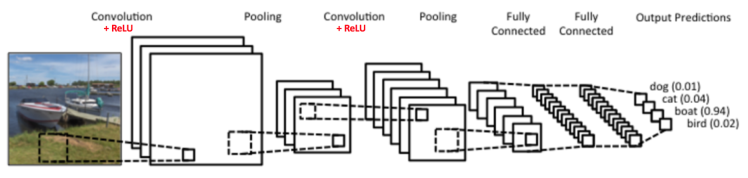

In [1]:
from PIL import Image
import urllib.request as url
import io

fd = url.urlopen("https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-4-59-29-pm.png?w=748")
image_file = io.BytesIO(fd.read())
Image.open(image_file)

Another layer common in CNNs is the pooling layer. Pooling is used to reduce the size of the image representation, which translates to reduction in the number of parameters and, ultimately, the computational effort. The most common CNN architectures typically start with a convolutional layer, followed by an activation layer, then a pooling layer, and end with a traditional fully connected network such as a Multi-Layer NN.

In [2]:
# Load the libraries.

%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt  
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
import pymc3 as pm
import theano
from mpl_toolkits.mplot3d import Axes3D
#import fix_yahoo_finance as yf
warnings.simplefilter('ignore')
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

## Case: Hand-written digit recognition

Let's revisit the case of digit classification from previous lab but use CNN for the task

Import the LeCun et al. MNIST dataset of handwritten characters

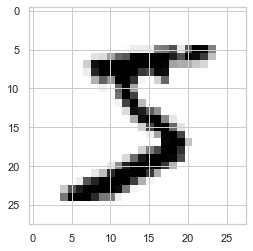

Training label(s): [5]


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_digits = 1
for i in range(num_digits):
    plt.subplot(1, num_digits, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray_r'))
#    plt.axis('off')
plt.show()
print('Training label(s): %s' % (y_train[0:num_digits],))

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

### Format of basic CNN in MNIST digit recognition task
- The first hidden layer is a convolutional layer called a Convolution2D. 
- The layer has 32 feature maps, each of which are 5 X 5, and a rectifier activation function. 
- This is the input layer, expecting images with the structure of [pixels] X [width] X [height].
- A pooling layer is then defined to take the maximum called "MaxPooling2D". 
- The next layer is a regularization using dropout called "Dropout" which eliminates 25% of neurons per layer.
- Next is a layer that converts the 2D matrix data to a vector using "Flatten", which allows the output to be processed by standard fully connected layers.
- The final connection layer contains 128 neurons and rectifier activation function.
- Everything is finally reduced using perceptron layer.  

In [6]:
# Preprocess the NMIST data, but maintain datastructure for CNN.

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_pp = (X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')) / 255
X_test_pp = (X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')) / 255


# Keras needs the labels as categorical metrics.
y_train_pp = np_utils.to_categorical(y_train)
y_test_pp = np_utils.to_categorical(y_test)
num_classes = y_test_pp.shape[1]

In [7]:
## model

np.random.seed(1066)
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile, fit, and generate scores and predicted probabilities.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pp, y_train_pp, validation_data=(X_test_pp, y_test_pp), epochs=5, batch_size=200, verbose=2)
scores = model.evaluate(X_test_pp, y_test_pp, verbose=0)
prob = model.predict(X_test_pp)

Epoch 1/5
300/300 - 16s - loss: 0.2367 - accuracy: 0.9309 - val_loss: 0.0688 - val_accuracy: 0.9797
Epoch 2/5
300/300 - 13s - loss: 0.0714 - accuracy: 0.9789 - val_loss: 0.0472 - val_accuracy: 0.9850
Epoch 3/5
300/300 - 12s - loss: 0.0523 - accuracy: 0.9837 - val_loss: 0.0437 - val_accuracy: 0.9859
Epoch 4/5
300/300 - 13s - loss: 0.0422 - accuracy: 0.9867 - val_loss: 0.0355 - val_accuracy: 0.9880
Epoch 5/5
300/300 - 12s - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0420 - val_accuracy: 0.9854


So with CNN we can now reach around 99% out-of-sample accuracy compared to 98% acheivable with a simple (often called "vanilla" NN) from the example in the previous lab

Let's check a case which was misclassified in previous lab with vanilla NN and see the CNN's prediction for it

Classified as a 9 with probability 0.982674


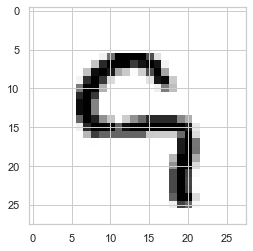

In [8]:
plt.imshow(X_test[104], cmap=plt.get_cmap('gray_r'))
print('Classified as a %d with probability %f' % (prob[104].argmax(), max(prob[104])))

In [9]:
print('Accuracy Rate: %f' % accuracy_score(y_test, prob.argmax(axis = 1)))
print('')
print('Confusion matrix:\n%s' % confusion_matrix(y_test, prob.argmax(axis = 1)))
print('')
print('Classification Report:')
print(classification_report(y_test, prob.argmax(axis = 1)))
print('')
(y_test - prob.argmax(axis = 1) > 0).nonzero()

Accuracy Rate: 0.985400

Confusion matrix:
[[ 972    0    2    0    0    0    2    1    3    0]
 [   0 1126    4    0    0    0    2    0    3    0]
 [   2    1 1023    0    0    0    0    2    4    0]
 [   0    0    0  999    0    5    0    0    6    0]
 [   0    0    2    0  974    0    2    0    3    1]
 [   2    0    0    7    0  879    1    0    3    0]
 [   7    2    1    0    1    1  942    0    4    0]
 [   0    2   11    3    1    1    0 1007    3    0]
 [   4    0    1    0    0    0    0    1  968    0]
 [   2    2    0    4    9    6    0    8   14  964]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99

(array([  62,  211,  247,  259,  320,  340,  359,  445,  448,  582,  684,
         726,  813,  882,  965, 1014, 1039, 1226, 1232, 1247, 1260, 1319,
        1326, 1393, 1414, 1530, 1553, 1554, 1709, 1717, 1754, 1901, 2035,
        2098, 2118, 2129, 2135, 2293, 2369, 2387, 2406, 2414, 2462, 2597,
        2654, 2720, 2742, 2760, 2896, 2939, 2979, 3005, 3030, 3060, 3422,
        3503, 3520, 3558, 3597, 3751, 3767, 3850, 3926, 3985, 4007, 4078,
        4224, 4238, 4248, 4575, 4761, 4807, 4814, 4823, 4966, 5246, 5937,
        6071, 6091, 6157, 6166, 6173, 6560, 6571, 6576, 9009, 9015, 9019,
        9024, 9530, 9587, 9638, 9679, 9692, 9770]),)

#### Let's use CNN for the facial recognition task we used in the PCA lab

In [10]:
# load the data

from sklearn.datasets import fetch_lfw_people 
from keras.datasets import mnist

lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4) 
  
# the images arrays to find the shapes (for plotting) 
n_samples, h, w = lfw_people.images.shape 
  
# Instead of providing 2D data, X has data already in the form  of a vector that 
# is required in this approach. 
X = lfw_people.data 
n_features = X.shape[1] 

y = lfw_people.target 
target_names = lfw_people.target_names 
n_classes = target_names.shape[0] 

In [11]:
X.shape

(1288, 1850)

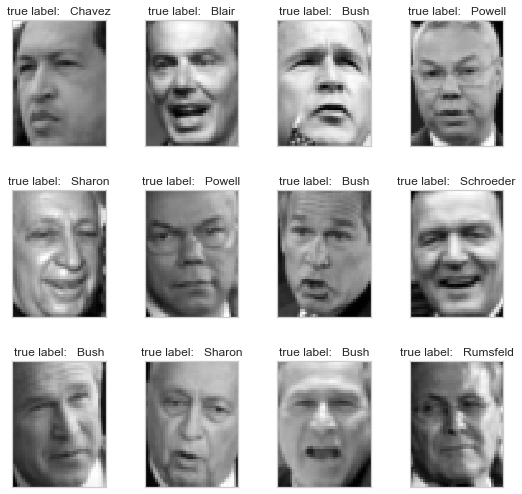

In [12]:
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4): 
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row)) 
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35) 
    for i in range(n_row * n_col): 
        plt.subplot(n_row, n_col, i + 1) 
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray) 
        plt.title(titles[i], size = 12) 
        plt.xticks(()) 
        plt.yticks(()) 
  
# Generate true labels above the images 
def true_title(Y, target_names, i): 
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1] 
    return 'true label:   % s' % (true_name) 
  
true_titles = [true_title(y, target_names, i) 
                     for i in range(y.shape[0])] 
plot_gallery(X, true_titles, h, w) 

the data is 1288 total (50$\times$37 pixels) grayscale images belonging to 7 different faces.

In [13]:
n_classes

7

In [14]:
# lets split and reform the dataset in the format compatible for CNN
# basically we are restructuring the data into grid shapes which are apt for convolutions and further steps

X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.2)

X_train_pp = (X_train.reshape(X_train.shape[0], 50, 37, 1).astype('float32')) / 255 # normalize
X_test_pp = (X_test.reshape(X_test.shape[0], 50, 37, 1).astype('float32')) / 255

y_train_pp = np_utils.to_categorical(y_train)
y_test_pp = np_utils.to_categorical(y_test)

num_classes = y_train_pp.shape[1]

In [15]:
print(X_train_pp.shape, X_test_pp.shape)

(1030, 50, 37, 1) (258, 50, 37, 1)


#### Model structure:

- add conv layer (Conv2D) with 32 features maps of (5$\times$5) dimension and input shape as the shape of images
- add a pooling layer "MaxPooling2D".
- add second conv layer to potentiall improve model performance
- Dropout to remove 25% neurons
- flatten and activation function to get output probabilities with softmax in the end

In [16]:
# model

np.random.seed(2002)
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(50, 37, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), input_shape=(50, 37, 1), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile, fit, and generate scores and predicted probabilities.
# should take under 2-3 minutes to train

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pp, y_train_pp, validation_data=(X_test_pp, y_test_pp), epochs=50, batch_size=200, verbose=2)
scores = model.evaluate(X_test_pp, y_test_pp, verbose=0)
prob = model.predict(X_test_pp)

Epoch 1/50
6/6 - 1s - loss: 1.8650 - accuracy: 0.2049 - val_loss: 1.7402 - val_accuracy: 0.4496
Epoch 2/50
6/6 - 1s - loss: 1.6967 - accuracy: 0.4019 - val_loss: 1.6259 - val_accuracy: 0.4496
Epoch 3/50
6/6 - 1s - loss: 1.6618 - accuracy: 0.4019 - val_loss: 1.5942 - val_accuracy: 0.4496
Epoch 4/50
6/6 - 1s - loss: 1.6029 - accuracy: 0.4049 - val_loss: 1.6013 - val_accuracy: 0.4922
Epoch 5/50
6/6 - 1s - loss: 1.5466 - accuracy: 0.4505 - val_loss: 1.4579 - val_accuracy: 0.5078
Epoch 6/50
6/6 - 1s - loss: 1.4188 - accuracy: 0.4990 - val_loss: 1.4191 - val_accuracy: 0.5116
Epoch 7/50
6/6 - 1s - loss: 1.3557 - accuracy: 0.5223 - val_loss: 1.2847 - val_accuracy: 0.5349
Epoch 8/50
6/6 - 1s - loss: 1.2284 - accuracy: 0.5699 - val_loss: 1.2837 - val_accuracy: 0.5620
Epoch 9/50
6/6 - 1s - loss: 1.1306 - accuracy: 0.6204 - val_loss: 1.0776 - val_accuracy: 0.6008
Epoch 10/50
6/6 - 1s - loss: 0.9923 - accuracy: 0.6592 - val_loss: 1.0594 - val_accuracy: 0.6473
Epoch 11/50
6/6 - 1s - loss: 0.9523 - a

In [17]:
# check accuracy score of predictions

from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict_classes(X_test_pp))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.8914728682170543

Better accuracy than kernel PCA, which got us accuracy around 79%

In [18]:
# let's change the dropout % to 0.4 and check the out of sample accuracy

np.random.seed(2002)
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(50, 37, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), input_shape=(50, 37, 1), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile, fit, and generate scores and predicted probabilities.
# should take under 2-3 minutes to train

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pp, y_train_pp, validation_data=(X_test_pp, y_test_pp), epochs=50, batch_size=200, verbose=2)
scores = model.evaluate(X_test_pp, y_test_pp, verbose=0)
prob = model.predict(X_test_pp)

Epoch 1/50
6/6 - 1s - loss: 1.9861 - accuracy: 0.2320 - val_loss: 1.8642 - val_accuracy: 0.1705
Epoch 2/50
6/6 - 1s - loss: 1.7984 - accuracy: 0.3495 - val_loss: 1.6615 - val_accuracy: 0.4496
Epoch 3/50
6/6 - 1s - loss: 1.7195 - accuracy: 0.4019 - val_loss: 1.6544 - val_accuracy: 0.4496
Epoch 4/50
6/6 - 1s - loss: 1.6867 - accuracy: 0.4019 - val_loss: 1.6501 - val_accuracy: 0.4496
Epoch 5/50
6/6 - 1s - loss: 1.6845 - accuracy: 0.4019 - val_loss: 1.6385 - val_accuracy: 0.4496
Epoch 6/50
6/6 - 1s - loss: 1.6709 - accuracy: 0.4019 - val_loss: 1.6439 - val_accuracy: 0.4496
Epoch 7/50
6/6 - 1s - loss: 1.6679 - accuracy: 0.4019 - val_loss: 1.6295 - val_accuracy: 0.4496
Epoch 8/50
6/6 - 1s - loss: 1.6547 - accuracy: 0.4019 - val_loss: 1.6290 - val_accuracy: 0.4496
Epoch 9/50
6/6 - 1s - loss: 1.6474 - accuracy: 0.4019 - val_loss: 1.6211 - val_accuracy: 0.4496
Epoch 10/50
6/6 - 1s - loss: 1.6378 - accuracy: 0.4019 - val_loss: 1.5979 - val_accuracy: 0.4496
Epoch 11/50
6/6 - 1s - loss: 1.6239 - a

In [19]:
accuracy_score(y_test, model.predict_classes(X_test_pp))

0.8255813953488372

Accuracy reduced significantly!